In [2]:
%pip install scikit-learn numpy pandas 1>/dev/null

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10_000, noise=0.4, random_state=42)

X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]], shape=(10000, 2))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

array([[-0.56413534,  0.29283681],
       [-1.16033479,  0.96512577],
       [-0.06598769, -0.15191052],
       ...,
       [ 0.38876425, -0.78662881],
       [ 2.50492832,  0.21133631],
       [ 0.35428745,  0.74582457]], shape=(8000, 2))

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"{train_acc=} {test_acc=}")

train_acc=1.0 test_acc=0.813


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = [
    ('precision', precision_score),
    ('recall', recall_score),
    ('f1', f1_score)
]

for metric_name, metric_fn in metrics:
    train_sc = metric_fn(y_train, y_pred_train)
    test_sc = metric_fn(y_test, y_pred_test)
    
    print(f"{metric_name} | {train_sc=} {test_sc=}")

precision | train_sc=1.0 test_sc=0.8068068068068068
recall | train_sc=1.0 test_sc=0.8166160081053698
f1 | train_sc=1.0 test_sc=0.8116817724068479


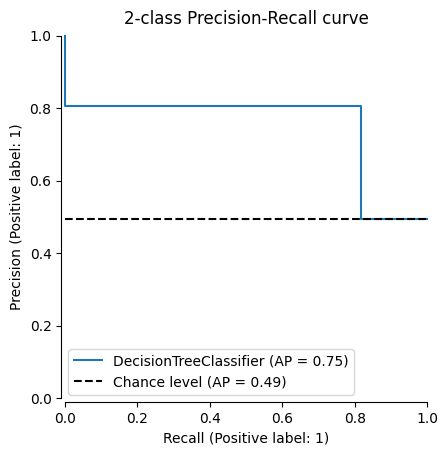

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# With PCA

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = make_pipeline(PCA(), DecisionTreeClassifier())
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"{train_acc=} {test_acc=}")

train_acc=1.0 test_acc=0.8125


# Ensemble

In [26]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = make_pipeline(
    StandardScaler(),
    VotingClassifier(
        estimators=[
            ('dt1', DecisionTreeClassifier()),
            ('dt2', DecisionTreeClassifier()),
            ('dt3', DecisionTreeClassifier())
        ]
    )
)
voting_clf.fit(X_train, y_train)

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"{train_acc=} {test_acc=}")

train_acc=1.0 test_acc=0.813


In [28]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = make_pipeline(
    StandardScaler(),
    VotingClassifier(
        estimators=[
            ('dt1', DecisionTreeClassifier()),
            ('dt2', DecisionTreeClassifier()),
            ('dt3', DecisionTreeClassifier())
        ],
        voting="soft"
    )
)
voting_clf.fit(X_train, y_train)

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"{train_acc=} {test_acc=}")

train_acc=1.0 test_acc=0.816


In [30]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        DecisionTreeClassifier()
    )
)
voting_clf.fit(X_train, y_train)

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"{train_acc=} {test_acc=}")

train_acc=0.9845 test_acc=0.846
